<a href="https://colab.research.google.com/github/MKastek/time-series-notes/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly detection  

- **What is anomaly**?  
An anomaly is “an observation which deviates so much from other observations as to arouse suspicions that it was generated by a different mechanism.” (Hawkings 1980)  

- **What is anomaly**?  
Anomalies are a subset of outliers (Aggarwal 2013)  
All observations = normal data + outliers  
Outliers = noise + anomalies  
Noise = uninteresting outliers  
Anomaly = sufficiently interesting outlier  


**Types of anomalies**  
- **Point anomalies**:  
an individual data point seems strange when compared with the rest of the data.
- **Contextual anomalies**:  
the data seems strange in a specific context, but not otherwise.  
- **Collective anomalies**:  
a collection of data points seems strange when compared with entire dataset, although each point may be OK.  

**Anomaly detection**
- Create a model for what normal data should look like
- Calculate a score for each data point that measures how far from normal it is
- If score is above a previously specified threshold, classify point as an anomaly

## Review of probability and statistics  
**Probability distribution**
- The chance of obtaining a data value (or range of values).
- The normal (Gaussian) distribution is the probability distribution most commonly used to model data.

**Cumulative distribution function (CDF)**
- For a real-valued random variable X, the CDF evaluated at x is the probability that X will take a value less than or equal to x.
- Usually denoted as F(x) with four basic properties:
$$
0 <= F(x) <=1 \;for\;all\;x  \\
\lim_{x \to -\inf} F(x) = 0 \\
\lim_{x \to +\inf} F(x) = 1 \\
F(x) \; is \; a \; non-decreasing \;function \; of \; x
$$

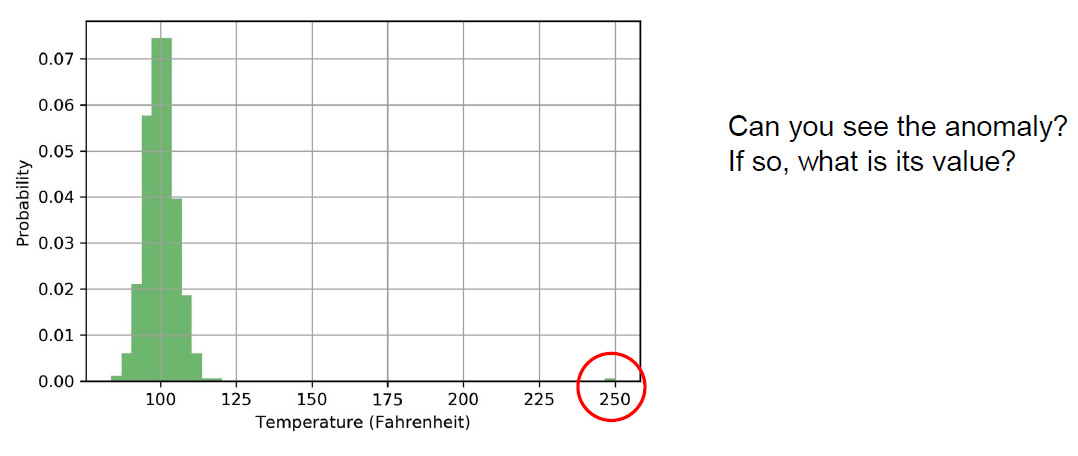

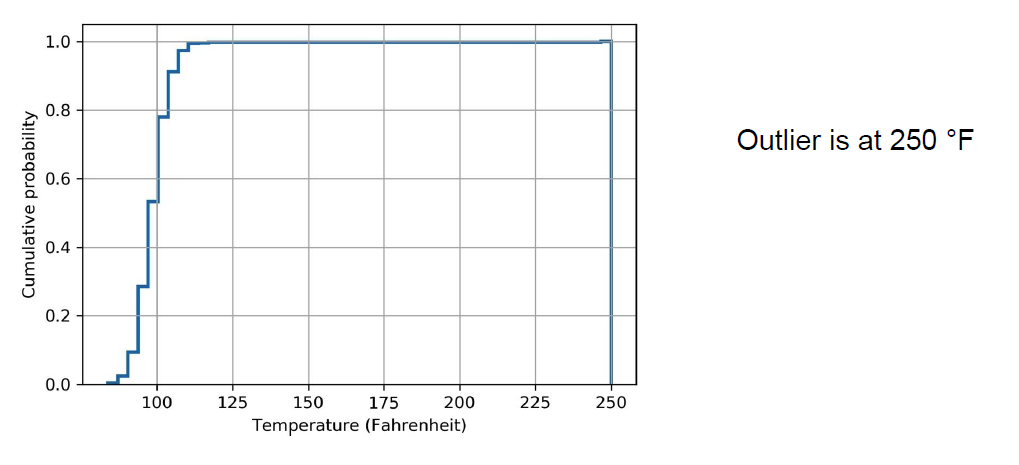

# Statistics fundamental

## Mean  
- Mean - expected value
- For a discrete random variable $X$ that can assume values $x_1, x_2, ... x_n$ it is given by:
$$
\mu = E[X] = \sum_{i=1}^{n}x_{i}p(x_{i})
$$
Where $p(x_{i})$ is the probability of getting outcome $x_{i}$ where $i = 1,2,..n$

## Median
- Median is the value sperating the higher half and lower half of the data

## Mode
- Mode is the value that appears most often  

## Variance  
- Variance is the spread of the data about the mean. The expected value of the square of the deviation of a random variable from its mean.
- For a discret random variable:
$$
var(X) = \sigma^{2}=E[(X-E[X])^2]=\sum^{n}_{i=1}(x_{i}-\mu)^{2}p(x_{i})
$$
Here $\sigma$ is the standard deviation. It is used frequently is anomaly detection.   
The value of $\sigma$ is sensitive to the presence of anomalies.

## Covariance  
- Covariance measures the joint variability of two random variables:
$$
cov(X,Y)=E[(X-E[X])(Y-E[Y])]=E[XY]-E[X]E[Y]
$$
- The covariance of a variable with itself is just the variance:
$$
cov(X,X)=var(X)
$$

## Scoring anomalies
A common method for scoring anomalies in 1D data is the z-score, if the mean and standard deviation are known, then for each data point calculate the z-score as:
$$
z_{i} = \frac{x_{i}-\mu}{\sigma}
$$
The z-score measures how far a point is away from the mean as signes multiple of the standard deviation.
- Large absolute values of the z-score suggest an anomaly.

# Extreme value analysis
- Block maxima: take one maximum value per unit time (often annual)  
- Peaks over threshold (exceedances): take all values over a specific threshold  

**Example**   
Consider a sequence of independent and identically-distributed random
variables:
$$
X_{1}, X_{2} ... X_{n}
$$  

**The extreme value theorem**  
- Let the maxima of the random variables be:  
$M_{n}=max(X_{1},X_{2},...X_{n})$  

- When n is large, the distribution of the maxima $M_n$ is a generalized extreme value (GEV) distribution, which is characterized by three parameters:

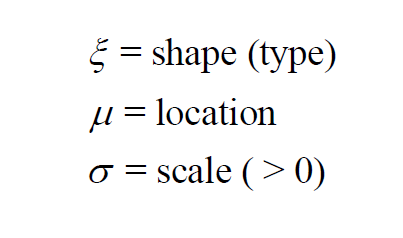

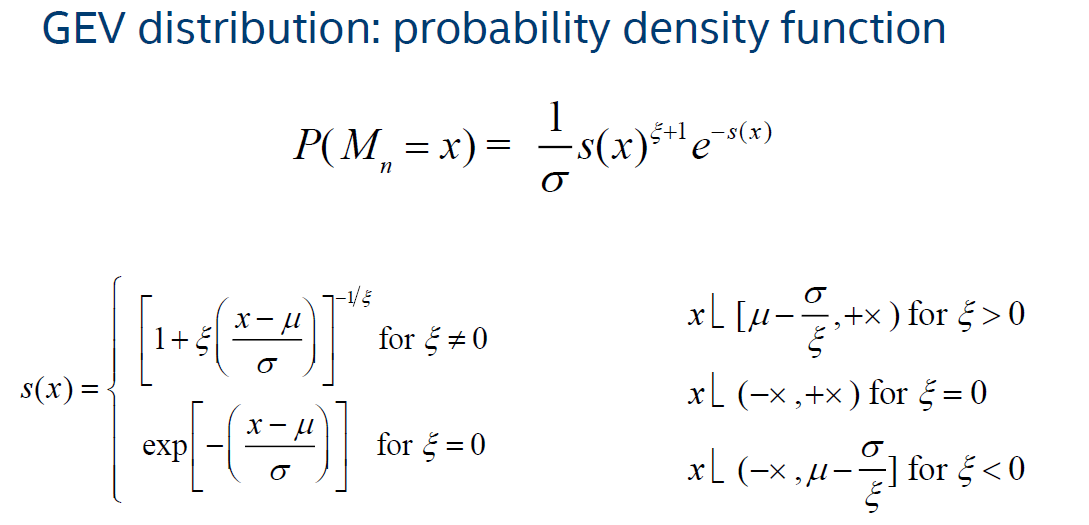

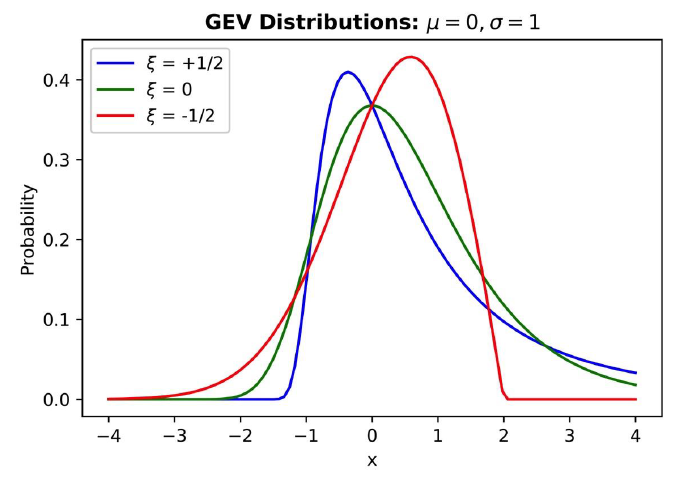

- Maxima of samples of size n will follow a GEV distribution if n is large enough  
- If you have enough data, you can use it to determine the three parameters that describe your GEV (ξ, μ, σ) = (shape, location, scale)
- Once you have your complete GEV (with parameters), you can answer questions such as, “How likely is it to exceed a certain value in a given unit of time?”

## Block maxima  
- Divide your data into blocks of fixed size. Typically, the size is one year.  
- For each one year block, find the maximum value. For a yearly division, the collection of maxima is known as an “annual maximum series” (AMS).
- Fit the AMS data with a GEV distribution. Extract the shape, location, scale and parameters

### Generalized Pareto Distribution  
- Consider a sequence of independent and identically-distributed random variables  
- Take only observations that are above a fixed threshold u
- When u is very large, the distribution of values above the threshold (exceedances) is a generalized Pareto distribution (GPD), which is characterized by three parameters:

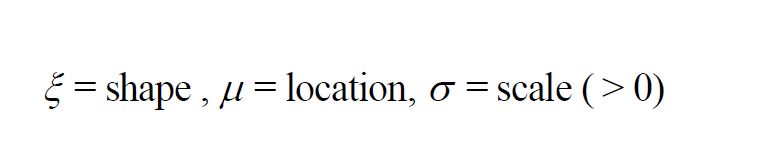

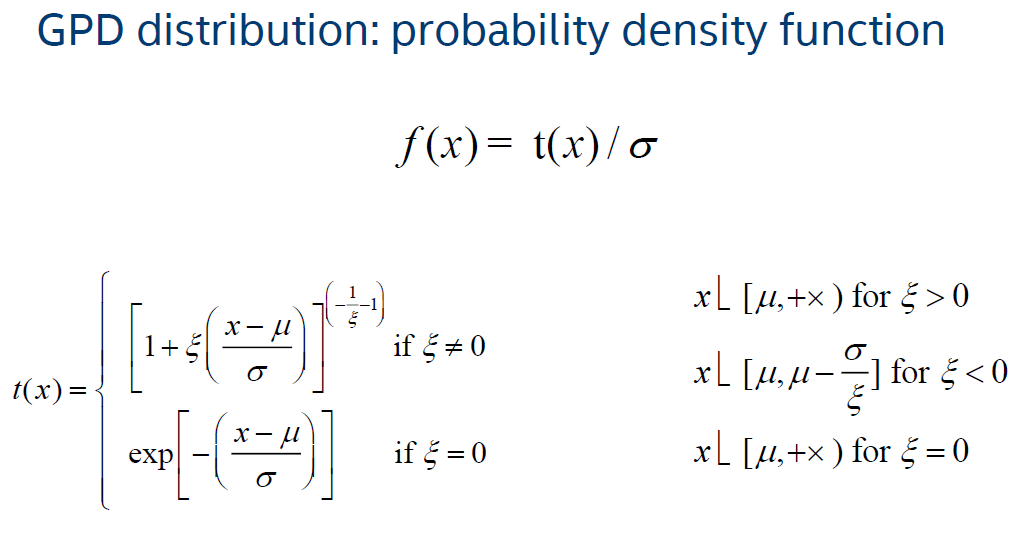

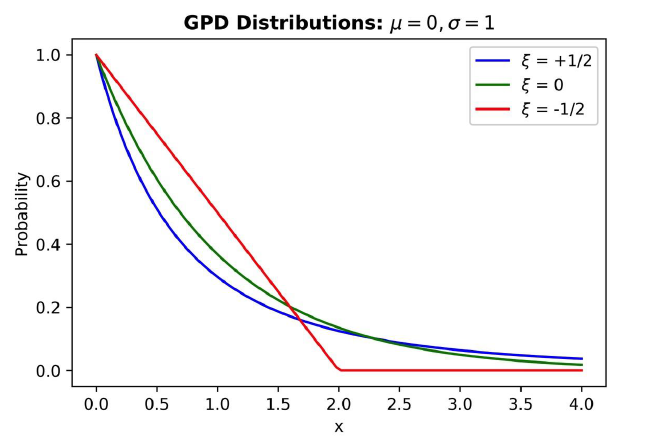

### Pickands-Balkema-de Haans Theorem  
- Universality—almost all probability distributions have a tail that is a GPD
- So if you have enough data, you can use it to determine the three parameters that describe your GPD (ξ, μ, σ) = (shape, location, scale)

### Peaks over threshold
- choose a threshold
- use only the data that is above threshold
- fit this data with a GPD distribution. Extract the shape, location, scale and parameters

### Extreme value analysis (EVA) - Final thoughts  
- For EVA to give reasonable results, it is important to check that mathematical assumptions behind the theorems are met - time series must be stationary.
- EVA will detect anomalies if they are maxima or minima.

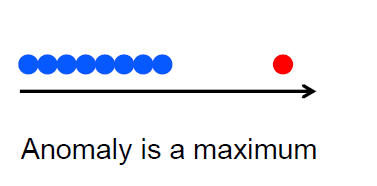

In [40]:
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
drive.mount('/content/drive')
import random

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
ozone_aqi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aqidailyozone.csv',
                        index_col=0,
                        parse_dates=True)
ozone_aqi

<ipython-input-9-8fde4613f078>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ozone_aqi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aqidailyozone.csv',


,Ozone AQI Value
Date,
1980-01-01,19
1980-01-02,16
1980-01-03,19
1980-01-04,17
1980-01-05,23
...,...
2017-12-27,36
2017-12-28,36
2017-12-29,34


In [11]:
year_grouper = pd.Grouper(freq='A')
ams = ozone_aqi.groupby(year_grouper).max();
ams

<ipython-input-11-24f9061945d4>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_grouper = pd.Grouper(freq='A')


,Ozone AQI Value
Date,
1980-12-31,278
1981-12-31,279
1982-12-31,248
1983-12-31,276
1984-12-31,251
1985-12-31,249
1986-12-31,236
1987-12-31,262
1988-12-31,266


In [18]:
fit = ss.genextreme.fit(ams)
print(fit)

(0.48070190276858693, 212.9835530676018, 36.562050718746406)


### GEV - Generalized Extreme Value distribution

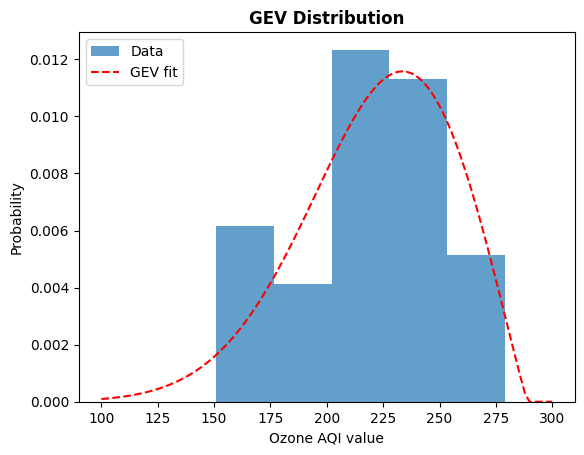

In [21]:
x = np.linspace(100, 300, 100)

plt.hist(ams.iloc[:,0], bins=5, density=True, alpha=0.7, label='Data')
plt.plot(x,ss.genextreme.pdf(x, fit[0], fit[1], fit[2]), 'r--',
         label='GEV fit')
plt.title('GEV Distribution', fontweight='bold')
plt.xlabel('Ozone AQI value')
plt.ylabel('Probability')
plt.legend(loc='upper left')
plt.show()

### What is the probability of exceeding an AQI of 200 in a given year?

In [22]:
prob_over_200 = (1.0 - ss.genextreme.cdf(200, fit[0], fit[1], fit[2]))
print('{:.2f}'.format(prob_over_200))

0.75


We might also be concerned about how bad are rare events. For example, what ozone AQI has one percent probability of being exceeded in a given year? This is the same as asking for the AQI at which the CDF is 0.99. We can use the inverse of the CDF, called the percent point function (PPF) to answer this question.





    "Question: What value of X has CDF(X) = 0.99?"

    "Answer: PPF(0.99)"


In [23]:
boundary = ss.genextreme.ppf(0.99, fit[0], fit[1], fit[2])
print(f'The one precent threshold ozone AQI level is {boundary:6.4f}')

The one precent threshold ozone AQI level is 280.7103


### Peak Over Threshold   
We note that most of the data is below an AQI of 100. Choose threshold as lowest value of the AMS (Annual Maximum Series).

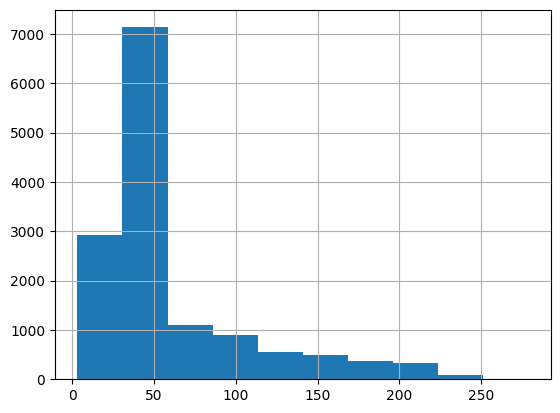

In [24]:
ozone_aqi['Ozone AQI Value'].hist();

In [25]:
min_max = ams.values.min()
print(f'Lowest maxima value for Ozone AQI in any year: {min_max}')

Lowest maxima value for Ozone AQI in any year: 151


In [26]:
def plot_tail(threshold):
    ozone_aqi_over_threshold = ozone_aqi[ozone_aqi['Ozone AQI Value'] > threshold]
    ozone_aqi_over_threshold.hist()

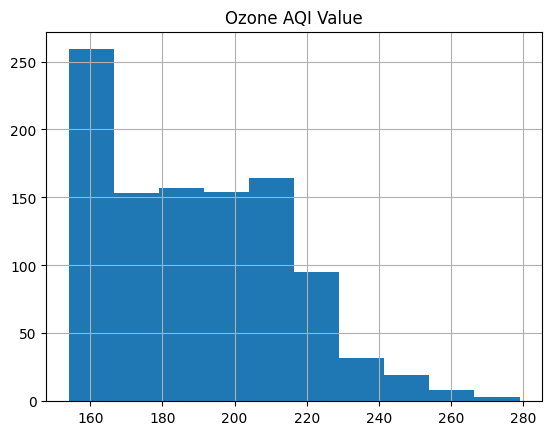

In [27]:
plot_tail(min_max)

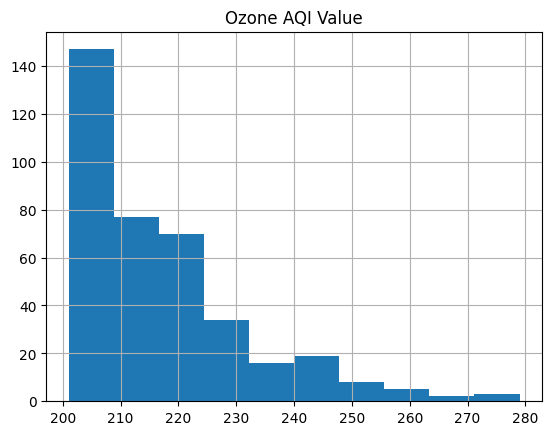

In [28]:
plot_tail(200)

In [29]:
threshold = 200
ozone_aqi_threshold = ozone_aqi[ozone_aqi['Ozone AQI Value'] > threshold].iloc[:,0]
fit_expon = ss.expon.fit(ozone_aqi_threshold)
print(fit_expon)

(201.0, 15.779527559055111)


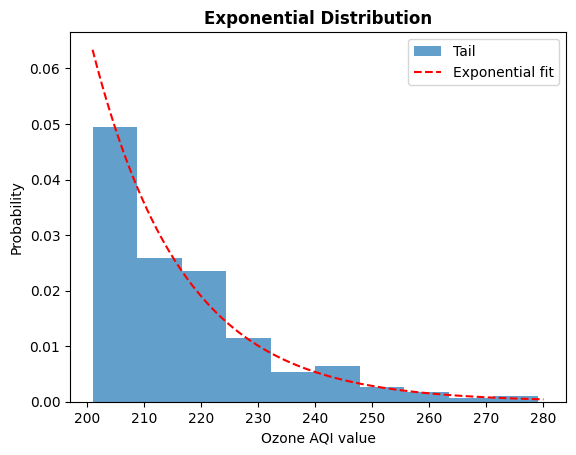

In [30]:
plt.hist(ozone_aqi_threshold, bins=10, density=True, alpha=0.7, label='Tail')
plt.plot(np.linspace(201, 280, 100),
         ss.expon.pdf(np.linspace(201, 280, 100), fit_expon[0], fit_expon[1]), 'r--',
         label='Exponential fit')
plt.title('Exponential Distribution', fontweight='bold')
plt.xlabel('Ozone AQI value')
plt.ylabel('Probability')
plt.legend(loc='upper right')
plt.show()


In [31]:
fit_gpd = ss.genpareto.fit(ozone_aqi_threshold, 20, loc=201, scale=16)
print(fit_gpd)

(-0.06709510873892582, 200.99999967754965, 16.71263276563655)


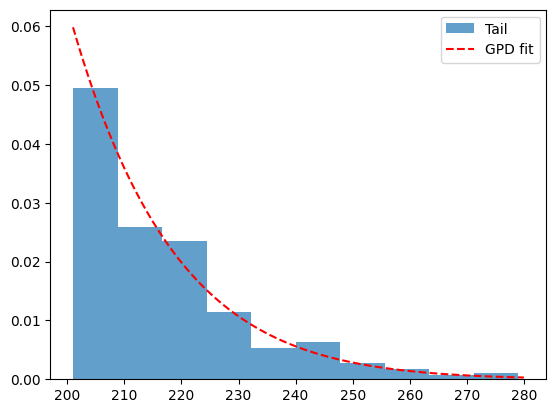

In [32]:
plt.hist(ozone_aqi_threshold, bins=10, density=True, alpha=0.7, label='Tail')
plt.plot(np.linspace(201, 280, 100),
         ss.genpareto.pdf(np.linspace(201, 280, 100), fit_gpd[0], fit_gpd[1], fit_gpd[2]), 'r--',
         label='GPD fit')
plt.legend(loc='upper right')
plt.show()

# Angle-based anomally detection

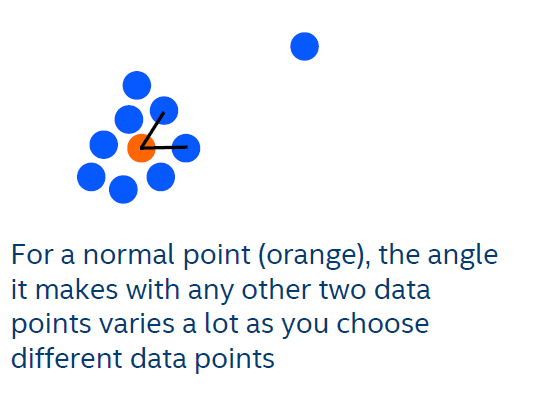

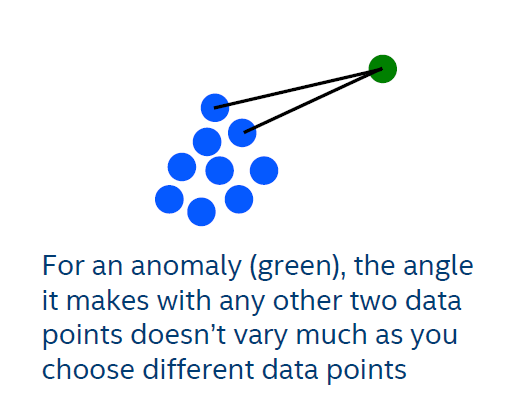

## Algorithm
- For each data point, determine the angle it makes with all pairs of other data points  
- Calculate the variance of this angle  
- Points for which the variance is below are predetermined threshold are anomalies

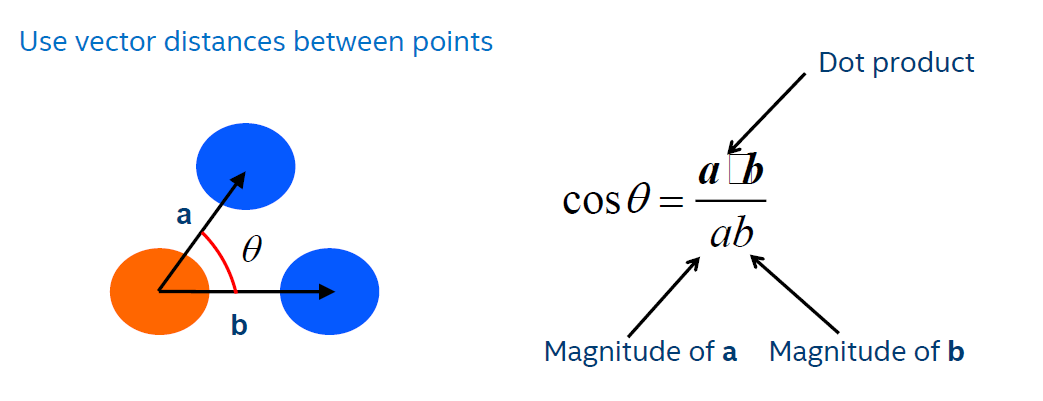

Algoritm does not work well in practice is slow and magnitude of a and b introduce a distance-dependence in this metric.

In [33]:
np.random.seed(16) # include a seed for reproducibility

# generate the normal data
normal_mean = np.array([1.0, 2.0])
normal_covariance = np.array([[0.2, 0.0], [0.0, 0.1]])
normal_data = np.random.multivariate_normal(normal_mean, normal_covariance, 100)

# generate the anomalous data
anomaly_mean = np.array([6.0, 8.0])
anomaly_covariance = np.array([[2.0, 0.0], [0.0, 4.0]])
anomaly_data = np.random.multivariate_normal(anomaly_mean, anomaly_covariance, 10)

# Note:
#
# Do not confuse the two uses of 'normal'
# The 'normal' in np.random.multivariate_normal refers to a Gaussian distribution
# and is not related to normal vs. anomaly
#

# Combine the data into one array for later use
all_data = np.concatenate((normal_data, anomaly_data), axis=0)

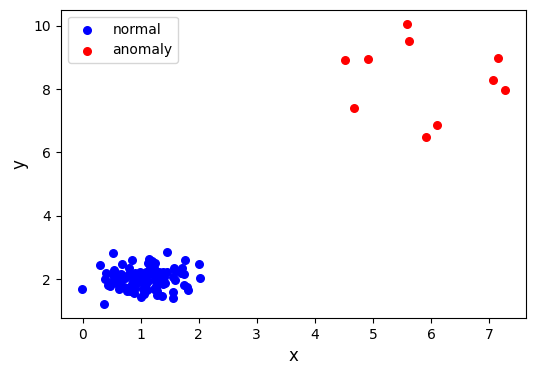

In [34]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)

ax1.scatter(normal_data[:,0], normal_data[:,1], s=30, c='b', marker="o", label='normal')
ax1.scatter(anomaly_data[:,0], anomaly_data[:,1], s=30, c='r', marker="o", label='anomaly')
plt.legend(loc='upper left');
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

In [35]:
def angle(point1, point2, point3):
    v21 = np.subtract(point2, point1)
    v31 = np.subtract(point3, point1)
    dot_product = (v21*v31).sum()
    normalization = np.linalg.norm(v21)*np.linalg.norm(v31)
    acute_angle = np.arccos(dot_product/normalization)
    return acute_angle

In [36]:
def eval_angle_point(point, data):
    angles_data = []
    for index_b, b in enumerate(data):
        if (np.array_equal(b, point)):
            continue
        # ensure point c comes later in array that point b
        # so we don't double count points
        for c in data[index_b + 1:]:
            if (np.array_equal(c, point)) or (np.array_equal(c, b)):
                continue
            angles_data.append(angle(point, b, c))
    return angles_data

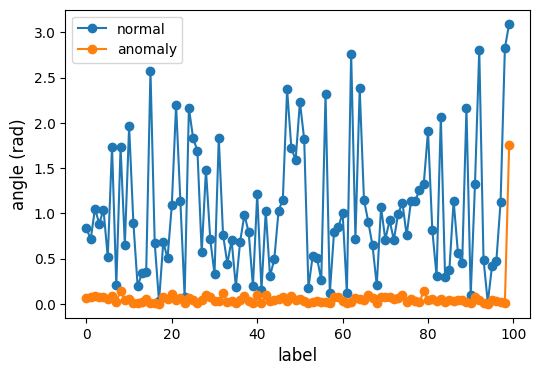

In [41]:
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(111)
np.random.seed(17)
normal_point = random.choice(normal_data)
anomaly_point = random.choice(anomaly_data)
normal_angles = eval_angle_point(normal_point, all_data)
anomaly_angles = eval_angle_point(anomaly_point, all_data)
ax2.plot(normal_angles[0:100],  marker="o", label='normal')
ax2.plot(anomaly_angles[0:100], marker="o", label='anomaly')
plt.xlabel('label', fontsize=12)
plt.ylabel('angle (rad)', fontsize=12)
plt.legend(loc='best')
plt.savefig('angle_based.png', dpi=600) # for use in the lecture
plt.show()

In [42]:
df_anomaly = pd.DataFrame(columns=['point','angle variance','type'])
for index, item in enumerate(anomaly_data):
    df_anomaly.loc[index] = [item, np.var(eval_angle_point(item, all_data)), 0]

In [43]:
df_normal = pd.DataFrame(columns=['point','angle variance','type'])
for index2, item2 in enumerate(normal_data):
    df_normal.loc[index2] = [item2, np.var(eval_angle_point(item2, all_data)), 1]

In [47]:
df_all = pd.concat([df_anomaly,df_normal], ignore_index=True)
df_all.sort_values(by=['angle variance']).head(10)

,point,angle variance,type
43,"[-0.007963240085042012, 1.6819486434208086]",0.085313,1
25,"[0.3717420163194104, 1.213654699499786]",0.091273,1
3,"[7.1614373367580715, 8.987418490481454]",0.091516,0
5,"[5.586324770476369, 10.062306048806747]",0.092226,0
2,"[5.618891639278701, 9.532065047272486]",0.224829,0
6,"[7.269879610663201, 7.966183826740902]",0.235928,0
0,"[7.066571495854759, 8.281551528370615]",0.239963,0
78,"[1.5633761101073278, 1.3905898245810073]",0.258711,1
90,"[0.29736034146994617, 2.4299459590107038]",0.268153,1
105,"[1.004238386524476, 1.4325277933330982]",0.310493,1


# Depth-based anomally detection  

- Anomalies are assumed to lie at the edge of the data space    
- Organize the data in layers  
- Each layer in labeled by its depth. The outermost layer is depth = 1, the next is depth = 2 and so on  
- Anomalies are those points with a depth below a pre-determined threshold  

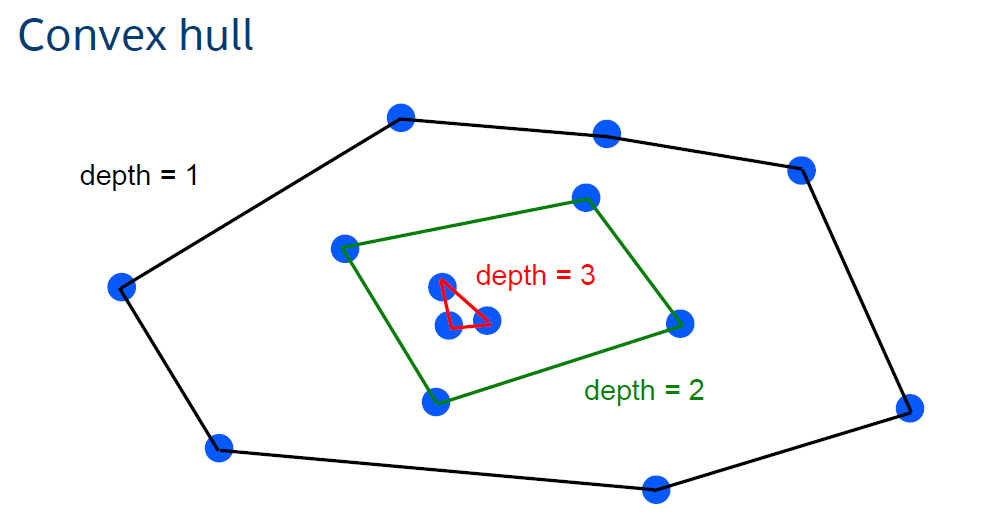